In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
# %matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn import preprocessing
from datetime import datetime
from datetime import timedelta
import statistics as s
import scipy as stats
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.datasets import mnist
import yfinance as yf
from datetime import date
import matplotlib.dates as mdates
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [2]:
gcode_orig = pd.read_csv("gcode_parsing.txt", delimiter='\t')

spiral_gcode_orig = pd.read_csv("spiral_gcode.txt", delimiter='\t')

cube_movement = pd.read_csv("data3.csv", delimiter=',')

cube_gcode_orig = pd.read_csv("gcode.txt", delimiter='\t')

# gcode_a = gcode_orig

# maska = ~gcode_a.astype(str).apply(lambda col: col.str.contains('A', na=False))
# # Replace values in the DataFrame where the mask is True with 0
# gcode_a[maska] = 0

In [3]:
# cube_gcode

In [4]:
gcode_orig

,n,x,y,z,a,b,f,i,j,k
0,N30,NaN,X2.5,Y2.5,NaN,NaN,NaN,NaN,NaN,NaN
1,N35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8044,N40225,X0.1443,Y-0.6713,Z0.3601,B8989.761,F1146.7051,NaN,NaN,NaN,NaN
8045,N40230,X0.1658,Y-0.6725,Z0.3507,B8986.302,F1145.3931,NaN,NaN,NaN,NaN
8046,N40235,X0.1875,Y-0.6738,Z0.3396,B8982.701,F1100.3659,NaN,NaN,NaN,NaN
8047,N40240,X0.2084,Y-0.675,Z0.3272,B8979.102,F1100.9995,NaN,NaN,NaN,NaN


In [5]:
spiral_gcode_orig

,n,x,y,z,b,a,f,i,k,j,p,f.1
0,N100,G3,X0.0193,Y-0.0158,Z1.6729,I0.0193,J-0.0158,F6.,NaN,NaN,NaN,NaN
1,N105,X-0.0193,Y0.0158,Z1.6443,I-0.0193,J0.0158,NaN,NaN,NaN,NaN,NaN,NaN
2,N110,X0.0193,Y-0.0158,Z1.6157,I0.0193,J-0.0158,NaN,NaN,NaN,NaN,NaN,NaN
3,N115,X0.025,Y0.,Z1.6095,I-0.0193,J0.0158,NaN,NaN,NaN,NaN,NaN,NaN
4,N120,X-0.025,I-0.025,J0.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5732,N28735,G53,G0,Z0.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5733,N28740,G53,G0,X2.5,Y2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5734,N28745,M999,P89.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5735,N28750,G0,A0.,B0.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
gcode = gcode_orig.copy()

In [7]:
spiral_gcode = spiral_gcode_orig.copy()

In [ ]:
gcode_a = gcode_orig.copy()
gcode_b = gcode_orig.copy()
gcode_x = gcode_orig.copy()
gcode_y = gcode_orig.copy()
gcode_z = gcode_orig.copy()

In [9]:
# spiral_gcode_y

In [10]:
gcode_y

,n,x,y,z,a,b,f,i,j,k
0,N30,NaN,X2.5,Y2.5,NaN,NaN,NaN,NaN,NaN,NaN
1,N35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8044,N40225,X0.1443,Y-0.6713,Z0.3601,B8989.761,F1146.7051,NaN,NaN,NaN,NaN
8045,N40230,X0.1658,Y-0.6725,Z0.3507,B8986.302,F1145.3931,NaN,NaN,NaN,NaN
8046,N40235,X0.1875,Y-0.6738,Z0.3396,B8982.701,F1100.3659,NaN,NaN,NaN,NaN
8047,N40240,X0.2084,Y-0.675,Z0.3272,B8979.102,F1100.9995,NaN,NaN,NaN,NaN


In [11]:
gcode_a

,n,x,y,z,a,b,f,i,j,k
0,N30,NaN,X2.5,Y2.5,NaN,NaN,NaN,NaN,NaN,NaN
1,N35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8044,N40225,X0.1443,Y-0.6713,Z0.3601,B8989.761,F1146.7051,NaN,NaN,NaN,NaN
8045,N40230,X0.1658,Y-0.6725,Z0.3507,B8986.302,F1145.3931,NaN,NaN,NaN,NaN
8046,N40235,X0.1875,Y-0.6738,Z0.3396,B8982.701,F1100.3659,NaN,NaN,NaN,NaN
8047,N40240,X0.2084,Y-0.675,Z0.3272,B8979.102,F1100.9995,NaN,NaN,NaN,NaN


In [12]:
gcode_b

,n,x,y,z,a,b,f,i,j,k
0,N30,NaN,X2.5,Y2.5,NaN,NaN,NaN,NaN,NaN,NaN
1,N35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8044,N40225,X0.1443,Y-0.6713,Z0.3601,B8989.761,F1146.7051,NaN,NaN,NaN,NaN
8045,N40230,X0.1658,Y-0.6725,Z0.3507,B8986.302,F1145.3931,NaN,NaN,NaN,NaN
8046,N40235,X0.1875,Y-0.6738,Z0.3396,B8982.701,F1100.3659,NaN,NaN,NaN,NaN
8047,N40240,X0.2084,Y-0.675,Z0.3272,B8979.102,F1100.9995,NaN,NaN,NaN,NaN


In [13]:
gcode_y

,n,x,y,z,a,b,f,i,j,k
0,N30,NaN,X2.5,Y2.5,NaN,NaN,NaN,NaN,NaN,NaN
1,N35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8044,N40225,X0.1443,Y-0.6713,Z0.3601,B8989.761,F1146.7051,NaN,NaN,NaN,NaN
8045,N40230,X0.1658,Y-0.6725,Z0.3507,B8986.302,F1145.3931,NaN,NaN,NaN,NaN
8046,N40235,X0.1875,Y-0.6738,Z0.3396,B8982.701,F1100.3659,NaN,NaN,NaN,NaN
8047,N40240,X0.2084,Y-0.675,Z0.3272,B8979.102,F1100.9995,NaN,NaN,NaN,NaN


In [ ]:

maska = ~gcode_a.astype(str).apply(lambda col: col.str.contains('A', na=False))
# Replace values in the DataFrame where the mask is True with 0
gcode_a[maska] = 0

maskb = ~gcode_b.astype(str).apply(lambda col1: col1.str.contains('B', na=False))
# Replace values in the DataFrame where the mask is True with 0
gcode_b[maskb] = 0

maskx = ~gcode_x.astype(str).apply(lambda col2: col2.str.contains('X', na=False))
# Replace values in the DataFrame where the mask is True with 0
gcode_x[maskx] = 0

masky = ~gcode_y.astype(str).apply(lambda col3: col3.str.contains('Y', na=False))
# Replace values in the DataFrame where the mask is True with 0
gcode_y[masky] = 0

maskz = ~gcode_z.astype(str).apply(lambda col4: col4.str.contains('Z', na=False))
# Replace values in the DataFrame where the mask is True with 0
gcode_z[maskz] = 0

In [ ]:
spiral_gcode_a = spiral_gcode_orig.copy()
spiral_gcode_b = spiral_gcode_orig.copy()
spiral_gcode_x = spiral_gcode_orig.copy()
spiral_gcode_y = spiral_gcode_orig.copy()
spiral_gcode_z = spiral_gcode_orig.copy()

spiralmaska = ~spiral_gcode_a.astype(str).apply(lambda col: col.str.contains('A', na=False))
# Replace values in the DataFrame where the mask is True with 0
spiral_gcode_a[spiralmaska] = 0

spiralmaskb = ~spiral_gcode_b.astype(str).apply(lambda col1: col1.str.contains('B', na=False))
# Replace values in the DataFrame where the mask is True with 0
spiral_gcode_b[spiralmaskb] = 0

spiralmaskx = ~spiral_gcode_x.astype(str).apply(lambda col2: col2.str.contains('X', na=False))
# Replace values in the DataFrame where the mask is True with 0
spiral_gcode_x[spiralmaskx] = 0

spiralmasky = ~spiral_gcode_y.astype(str).apply(lambda col3: col3.str.contains('Y', na=False))
# Replace values in the DataFrame where the mask is True with 0
spiral_gcode_y[spiralmasky] = 0

spiralmaskz = ~spiral_gcode_z.astype(str).apply(lambda col4: col4.str.contains('Z', na=False))
# Replace values in the DataFrame where the mask is True with 0
spiral_gcode_z[spiralmaskz] = 0


aspiralmelted_df = spiral_gcode_a.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = aspiralmelted_df[aspiralmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(spiral_gcode_a.index, fill_value=0)
a_spiral_df = pd.DataFrame(result_series)
a_spiral_df.columns = ['b']

bspiralmelted_df = spiral_gcode_b.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = bspiralmelted_df[bspiralmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(spiral_gcode_b.index, fill_value=0)
b_spiral_df = pd.DataFrame(result_series)
b_spiral_df.columns = ['b']

xspiralmelted_df = spiral_gcode_x.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = xspiralmelted_df[xspiralmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(spiral_gcode_x.index, fill_value=0)
x_spiral_df = pd.DataFrame(result_series)
x_spiral_df.columns = ['x']

yspiralmelted_df = spiral_gcode_y.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = yspiralmelted_df[yspiralmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(spiral_gcode_y.index, fill_value=0)
y_spiral_df = pd.DataFrame(result_series)
y_spiral_df.columns = ['y']

zspiralmelted_df = spiral_gcode_z.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = zspiralmelted_df[zspiralmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(spiral_gcode_z.index, fill_value=0)
z_spiral_df = pd.DataFrame(result_series)
z_spiral_df.columns = ['z']

In [16]:

cube_gcode_a = cube_gcode_orig.copy()
cube_gcode_b = cube_gcode_orig.copy()
cube_gcode_x = cube_gcode_orig.copy()
cube_gcode_y = cube_gcode_orig.copy()
cube_gcode_z = cube_gcode_orig.copy()

cubemaska = ~cube_gcode_a.astype(str).apply(lambda col: col.str.contains('A', na=False))
# Replace values in the DataFrame where the mask is True with 0
cube_gcode_a[cubemaska] = 0

cubemaskb = ~cube_gcode_b.astype(str).apply(lambda col1: col1.str.contains('B', na=False))
# Replace values in the DataFrame where the mask is True with 0
cube_gcode_b[cubemaskb] = 0

cubemaskx = ~cube_gcode_x.astype(str).apply(lambda col2: col2.str.contains('X', na=False))
# Replace values in the DataFrame where the mask is True with 0
cube_gcode_x[cubemaskx] = 0

cubemasky = ~cube_gcode_y.astype(str).apply(lambda col3: col3.str.contains('Y', na=False))
# Replace values in the DataFrame where the mask is True with 0
cube_gcode_y[cubemasky] = 0

cubemaskz = ~cube_gcode_z.astype(str).apply(lambda col4: col4.str.contains('Z', na=False))
# Replace values in the DataFrame where the mask is True with 0
cube_gcode_z[cubemaskz] = 0


acubemelted_df = cube_gcode_a.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = acubemelted_df[acubemelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(cube_gcode_a.index, fill_value=0)
a_cube_df = pd.DataFrame(result_series)
a_cube_df.columns = ['a']

bcubemelted_df = cube_gcode_b.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = bcubemelted_df[bcubemelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(cube_gcode_b.index, fill_value=0)
b_cube_df = pd.DataFrame(result_series)
b_cube_df.columns = ['b']

xcubemelted_df = cube_gcode_x.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = xcubemelted_df[xcubemelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(cube_gcode_x.index, fill_value=0)
x_cube_df = pd.DataFrame(result_series)
x_cube_df.columns = ['x']

ycubemelted_df = cube_gcode_y.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = ycubemelted_df[ycubemelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(cube_gcode_y.index, fill_value=0)
y_cube_df = pd.DataFrame(result_series)
y_cube_df.columns = ['y']

zcubemelted_df = cube_gcode_z.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = zcubemelted_df[zcubemelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(cube_gcode_z.index, fill_value=0)
z_cube_df = pd.DataFrame(result_series)
z_cube_df.columns = ['z']

In [17]:
a_cube_df

,a
0,0
1,0
2,0
3,0
4,0
...,...
595,0
596,0
597,0
598,[A0.]


In [18]:
z_spiral_df

,z
0,[Z1.6729]
1,[Z1.6443]
2,[Z1.6157]
3,[Z1.6095]
4,0
...,...
5732,[Z0.]
5733,0
5734,0
5735,0


In [ ]:
# spiral_df = pd.concat([a_spiral_df, b_spiral_df, x_spiral_df, y_spiral_df, z_spiral_df], axis=1)
# spiral_df.to_csv('spiral_gcode_movement_num.csv', index=False)

In [20]:
##gcode_a.to_csv('gcode_a.csv', index=False)

In [21]:
gcode_a

,n,x,y,z,a,b,f,i,j,k
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8044,0,0,0,0,0,0,0,0,0,0
8045,0,0,0,0,0,0,0,0,0,0
8046,0,0,0,0,0,0,0,0,0,0
8047,0,0,0,0,0,0,0,0,0,0


In [22]:
amelted_df = gcode_a.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')

# 2. Filter non-zero values
non_zero_values = amelted_df[amelted_df['value'] != 0]

# 3. Group and aggregate into a list
combined_column = non_zero_values.groupby('index')['value'].apply(list)

# # 4. Re-index to ensure original index size and order
# # Fill missing values (indices with no non-zero elements) with empty lists
result_series = combined_column.reindex(gcode_a.index, fill_value=0)

# # Create a new DataFrame with the combined column
a_df = pd.DataFrame(result_series) # , columns=['combined_non_zero_elements'])
a_df.columns = ['a']


bmelted_df = gcode_b.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = bmelted_df[bmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(gcode_b.index, fill_value=0)
b_df = pd.DataFrame(result_series)
b_df.columns = ['b']


xmelted_df = gcode_x.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = xmelted_df[xmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(gcode_x.index, fill_value=0)
x_df = pd.DataFrame(result_series)
x_df.columns = ['x']


ymelted_df = gcode_y.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = ymelted_df[ymelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(gcode_y.index, fill_value=0)
y_df = pd.DataFrame(result_series)
y_df.columns = ['y']


zmelted_df = gcode_z.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = zmelted_df[zmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(gcode_z.index, fill_value=0)
z_df = pd.DataFrame(result_series)
z_df.columns = ['z']

In [23]:
z_df.head()

,z
0,0
1,0
2,0
3,0
4,0


In [24]:
gcode_movement = pd.concat([a_df, b_df, x_df, y_df, z_df], axis=1)#, ignore_index=True)

In [25]:
# gcode_movement.to_csv('spiral_gcode_movement_num.csv', index=False)

In [26]:
pocket_move_df = pd.read_csv('pocket_sorted_time.csv') #'spiral_date_test1.txt', delimiter='\t')
spiral_move_df = pd.read_csv('spiral_sorted_time_2.csv') #'spiral_date_test1.txt', delimiter='\t')

In [27]:
gcode_movement_values = pd.read_csv("gcode_movement_num.csv", delimiter=',')
spiral_gcode_values = pd.read_csv("spiral_gcode_movement_num.csv", delimiter=',') # fix set
cube_gcode_values = pd.read_csv("cube_gcode_movement_num.csv", delimiter=',')
# spiral_movement = pd.read_csv('spiral_sorted_time_2.csv')

In [28]:
spiral_gcode_values

,b,b.1,x,y,z
0,0.0,0.0,0.0193,-0.0158,1.6729
1,0.0,0.0,-0.0193,0.0158,1.6443
2,0.0,0.0,0.0193,-0.0158,1.6157
3,0.0,0.0,0.0250,0.0000,1.6095
4,0.0,0.0,-0.0250,0.0000,0.0000
...,...,...,...,...,...
5732,0.0,0.0,0.0000,0.0000,0.0000
5733,0.0,0.0,2.5000,2.5000,0.0000
5734,0.0,0.0,0.0000,0.0000,0.0000
5735,0.0,0.0,0.0000,0.0000,0.0000


In [29]:
# spiral_movement

In [30]:
gcode_movement_values

,a,b,x,y,z
0,0,0.000,2.5000,2.5000,0.0000
1,0,0.000,0.0000,0.0000,0.0000
2,0,0.000,0.0000,0.0000,0.0000
3,0,0.000,0.0000,0.0000,0.0000
4,0,0.000,0.0000,0.0000,0.0000
...,...,...,...,...,...
8044,0,8989.761,0.1443,-0.6713,0.3601
8045,0,8986.302,0.1658,-0.6725,0.3507
8046,0,8982.701,0.1875,-0.6738,0.3396
8047,0,8979.102,0.2084,-0.6750,0.3272


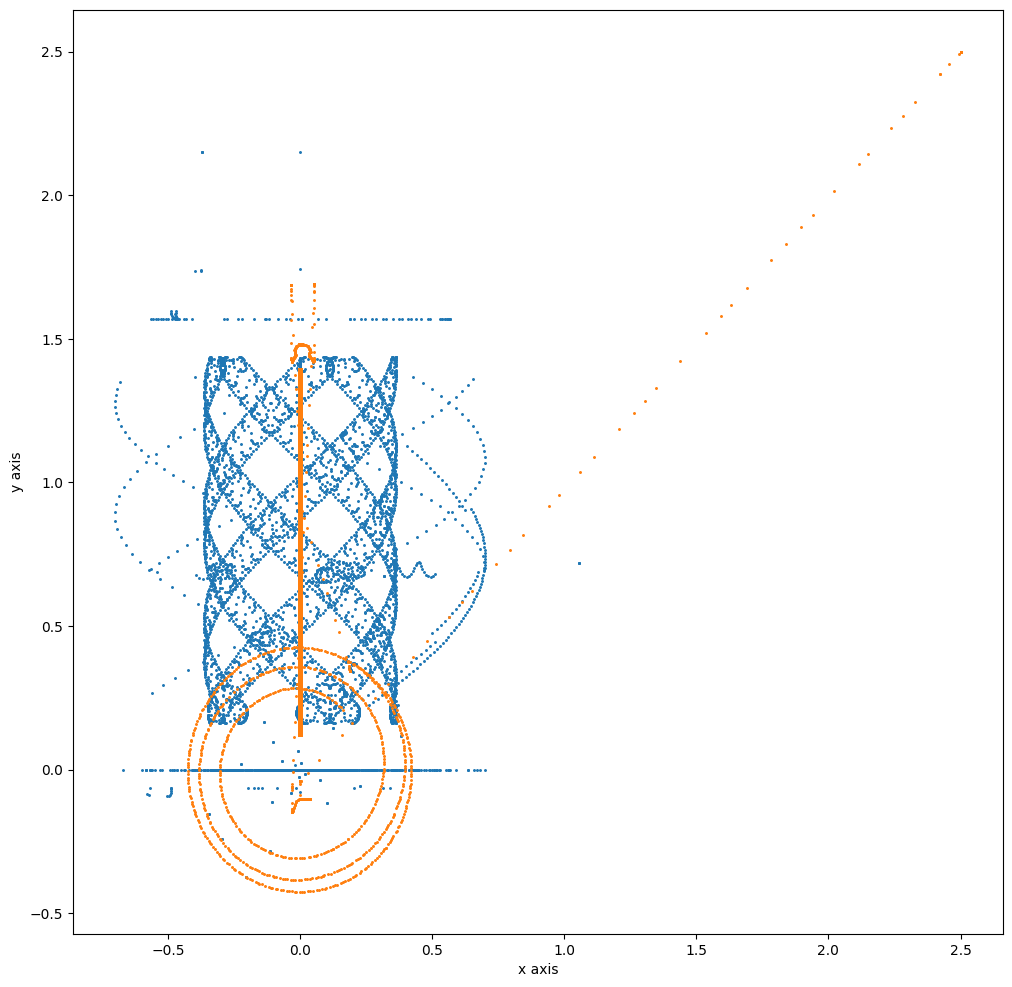

In [31]:
plt.figure(figsize=(12, 12))
plt.scatter(spiral_gcode_values['x'], spiral_gcode_values['y'], marker='.', s=5)
plt.scatter(spiral_move_df['xpm'], spiral_move_df['ypm'], marker='.', s=5)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

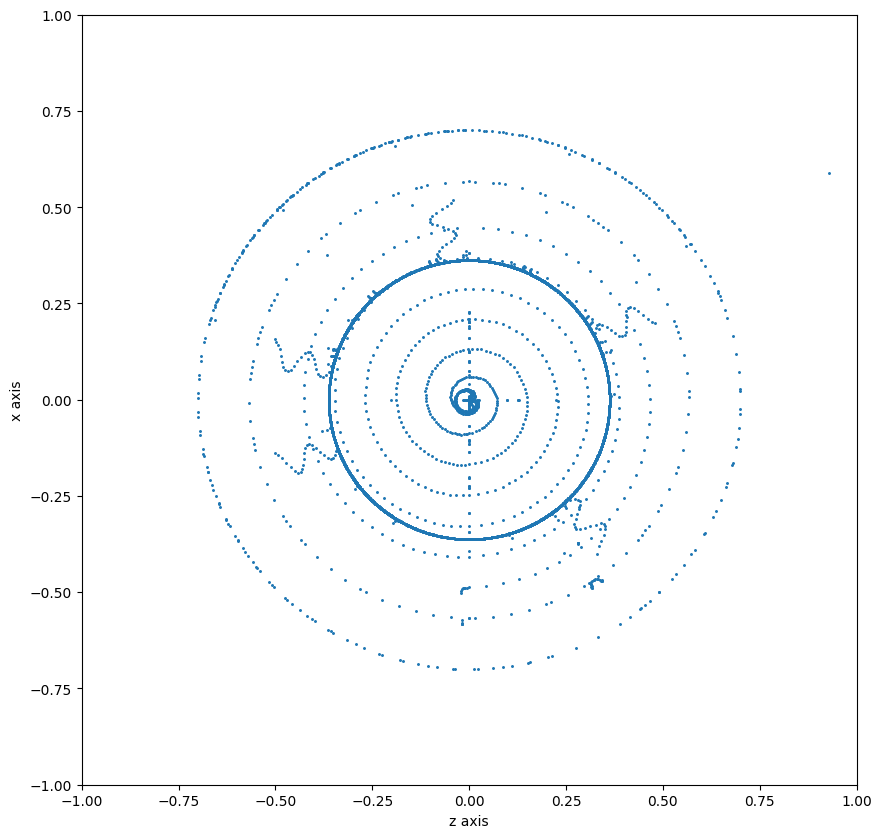

In [32]:
plt.figure(figsize=(10, 10))
plt.scatter(spiral_gcode_values['z'], spiral_gcode_values['x'], marker='.', s=5)
plt.xlabel('z axis')
plt.ylabel('x axis')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

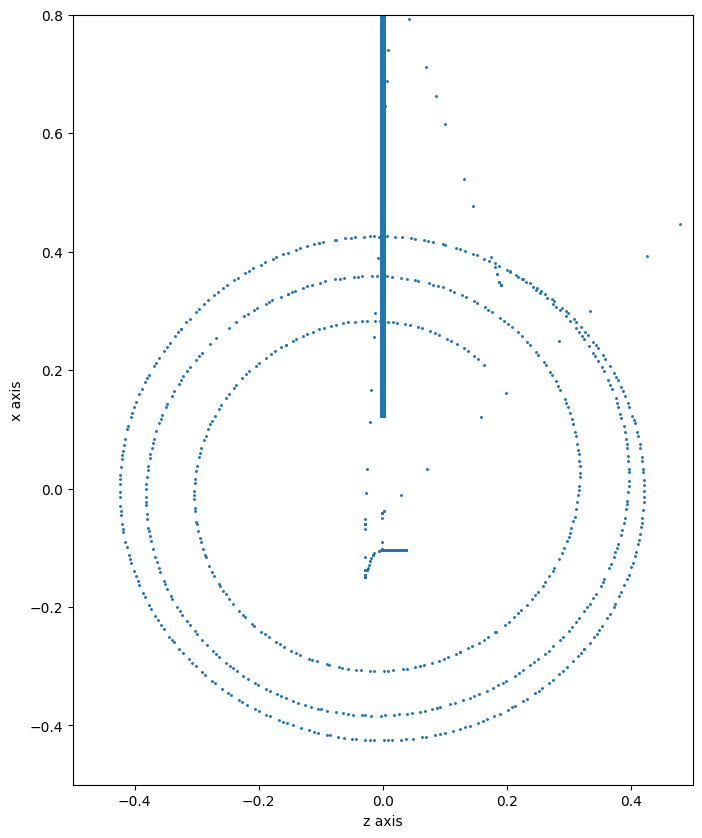

In [33]:
plt.figure(figsize=(8, 10))
plt.scatter(spiral_move_df['xpm'], spiral_move_df['ypm'], marker='.', s=5)
plt.xlabel('z axis')
plt.ylabel('x axis')
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.8)
plt.show()

In [34]:
spiral_gcode_values

,b,b.1,x,y,z
0,0.0,0.0,0.0193,-0.0158,1.6729
1,0.0,0.0,-0.0193,0.0158,1.6443
2,0.0,0.0,0.0193,-0.0158,1.6157
3,0.0,0.0,0.0250,0.0000,1.6095
4,0.0,0.0,-0.0250,0.0000,0.0000
...,...,...,...,...,...
5732,0.0,0.0,0.0000,0.0000,0.0000
5733,0.0,0.0,2.5000,2.5000,0.0000
5734,0.0,0.0,0.0000,0.0000,0.0000
5735,0.0,0.0,0.0000,0.0000,0.0000


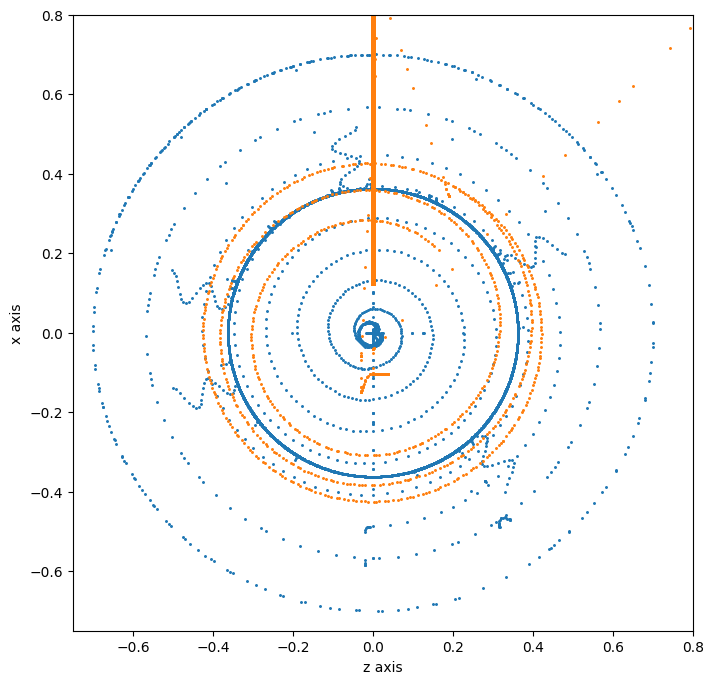

In [35]:
plt.figure(figsize=(8, 8))
plt.scatter(spiral_gcode_values['z'], spiral_gcode_values['x'], marker='.', s=5) # spiral_gcode_values['z'][:2500]
plt.scatter(spiral_move_df['xpm'], spiral_move_df['ypm'], marker='.', s=5)
plt.xlabel('z axis')
plt.ylabel('x axis')
plt.xlim(-0.75, 0.8)
plt.ylim(-0.75, 0.8)
plt.show()

because the gcode will have fewer points than the movement data, determine if the gcode is within the vector space of the movement data. May be that the gcode will be within a range of the movement data vector space. 
- Determine polynomial function that describes the line fit through the movement data, then determine if the gcode exists within a range of this functions output.
- measure orthogonal distances of gcode points to polynomial graph

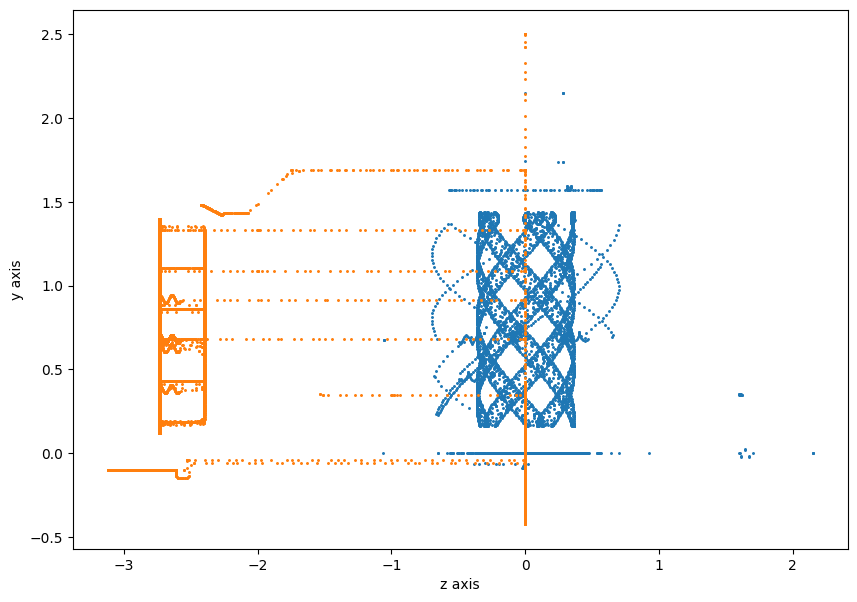

In [36]:
plt.figure(figsize=(10, 7))
plt.scatter(spiral_gcode_values['z'], spiral_gcode_values['y'], marker='.', s=5)
plt.scatter(spiral_move_df['zpm'], spiral_move_df['ypm'], marker='.', s=5)
plt.xlabel('z axis')
plt.ylabel('y axis')
# plt.ylim(-1.75, 0.25)
plt.show()

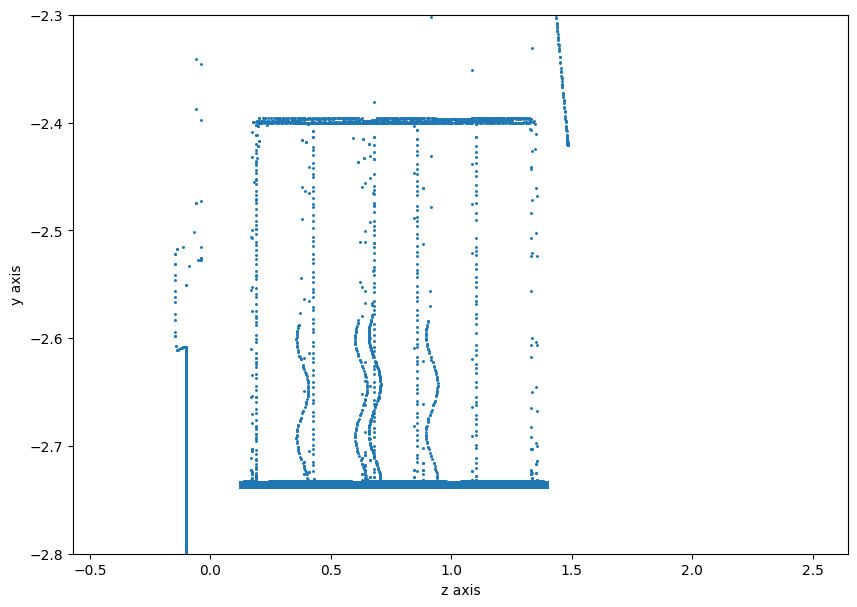

In [37]:
plt.figure(figsize=(10, 7))
# plt.scatter(spiral_gcode_values['z'], spiral_gcode_values['y'], marker='.', s=5)
plt.scatter(spiral_move_df['ypm'], spiral_move_df['zpm'], marker='.', s=5)
plt.xlabel('z axis')
plt.ylabel('y axis')
plt.ylim(-2.8, -2.3)
plt.show()

In [38]:
# cube_movement = pd.read_csv("data 3.csv", delimiter=',')

In [39]:
cube_movement

,a,b,x,y,z
0,0.0,0.0000,2.5,2.5,0.0
1,0.0,0.0000,2.5,2.5,0.0
2,0.0,0.0000,2.5,2.5,0.0
3,0.0,0.0000,2.5,2.5,0.0
4,0.0,0.0000,2.5,2.5,0.0
...,...,...,...,...,...
139453,0.0,20.1381,2.5,2.5,0.0
139454,0.0,20.1381,2.5,2.5,0.0
139455,0.0,18.3001,2.5,2.5,0.0
139456,0.0,18.3001,2.5,2.5,0.0


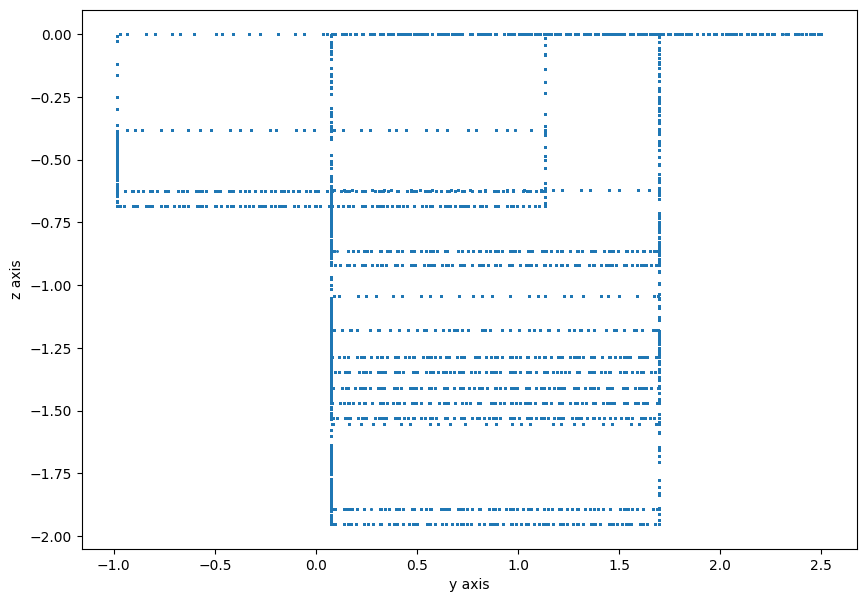

In [40]:
plt.figure(figsize=(10, 7))
plt.scatter(cube_movement['y'], cube_movement['z'], marker='.', s=5)
plt.xlabel('y axis')
plt.ylabel('z axis')
# plt.ylim(-2.8, -2.3)
plt.show()

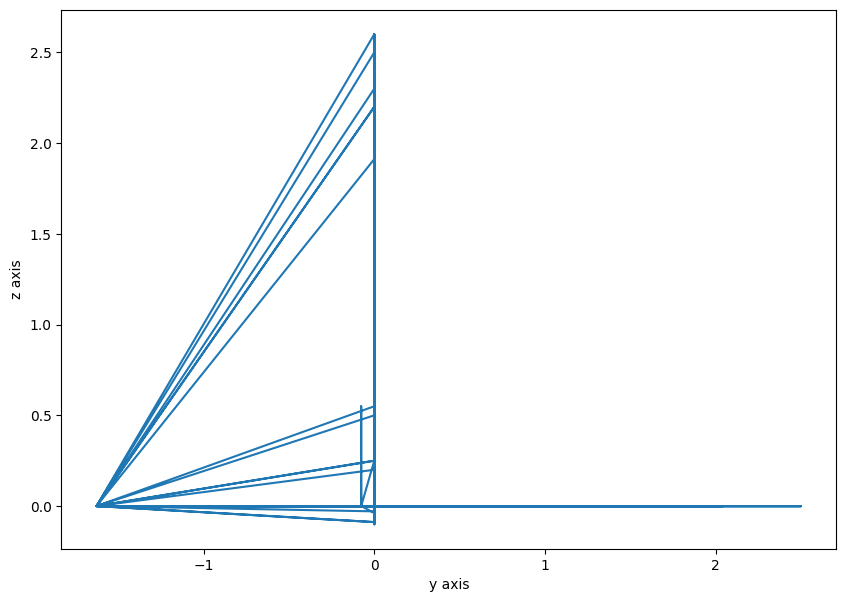

In [41]:
plt.figure(figsize=(10, 7))
plt.plot(cube_gcode_values['y'], cube_gcode_values['z']) #, marker='.', s=5)
plt.xlabel('y axis')
plt.ylabel('z axis')
# plt.ylim(-2.8, -2.3)
plt.show()

In [42]:
cube_gcode_values

,a,b,x,y,z
0,0,0,0.0,0.0,0.0
1,0,0,0.0,0.0,0.0
2,0,0,0.0,0.0,0.0
3,0,0,0.0,0.0,0.0
4,0,0,2.5,2.5,0.0
...,...,...,...,...,...
595,0,0,0.0,0.0,0.0
596,0,0,2.5,2.5,0.0
597,0,0,0.0,0.0,0.0
598,0,0,0.0,0.0,0.0


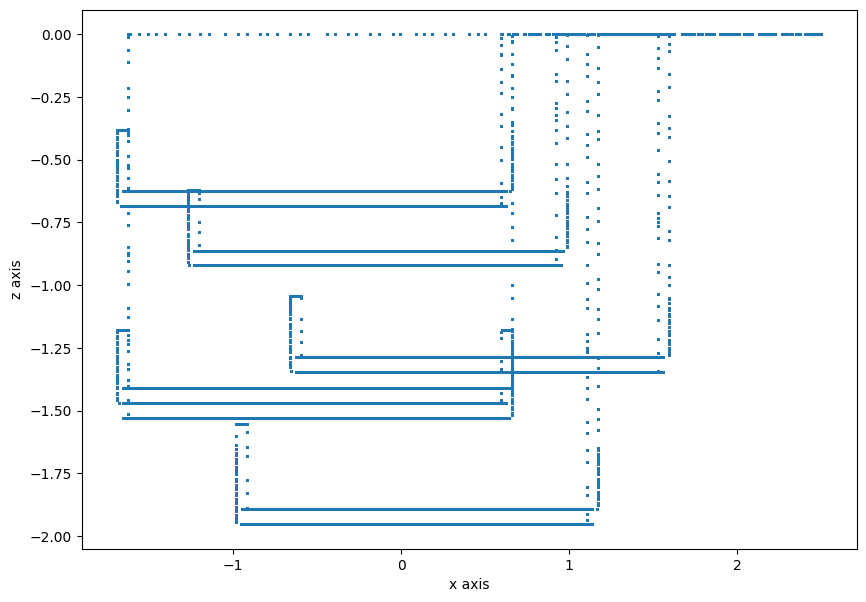

In [43]:
plt.figure(figsize=(10, 7))
plt.scatter(cube_movement['x'], cube_movement['z'], marker='.', s=5)
plt.xlabel('x axis')
plt.ylabel('z axis')
# plt.ylim(-2.8, -2.3)
plt.show()

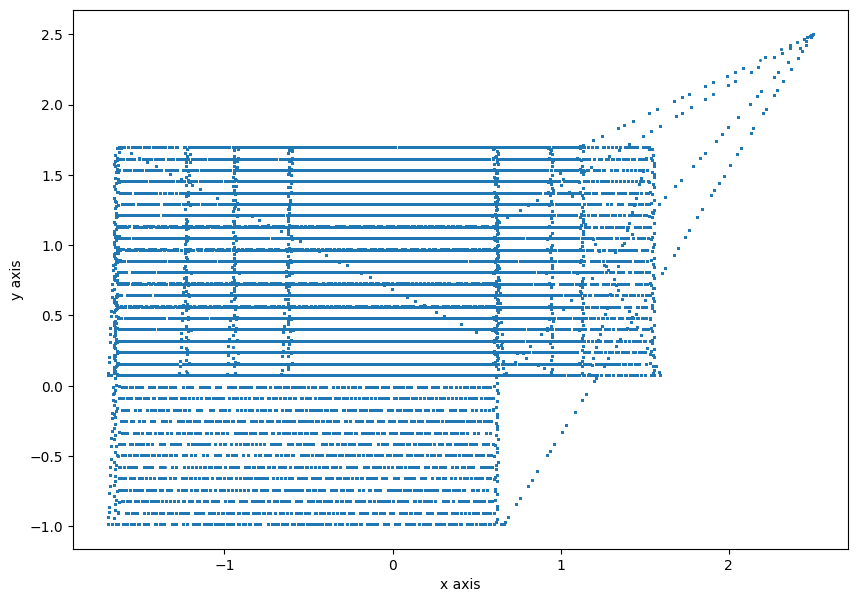

In [44]:
plt.figure(figsize=(10, 7))
plt.scatter(cube_movement['x'], cube_movement['y'], marker='.', s=5)
plt.xlabel('x axis')
plt.ylabel('y axis')
# plt.ylim(-2.8, -2.3)
plt.show()

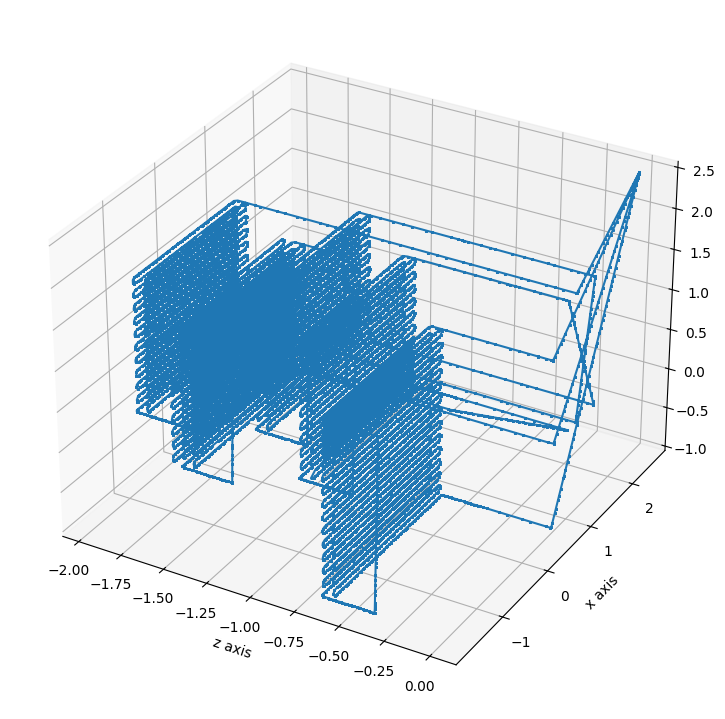

In [45]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# fig.canvas.draw()
# fig.set_layout_engine("none")
ax.set_position([-0.75, 0.025, 2.5, 1])
# fig = plt.figure()
# ax = Axes3D(fig)
plt.plot(cube_movement['z'], cube_movement['x'], cube_movement['y'], marker='.', markersize=2)
plt.xlabel('z axis')
plt.ylabel('x axis')
plt.show()

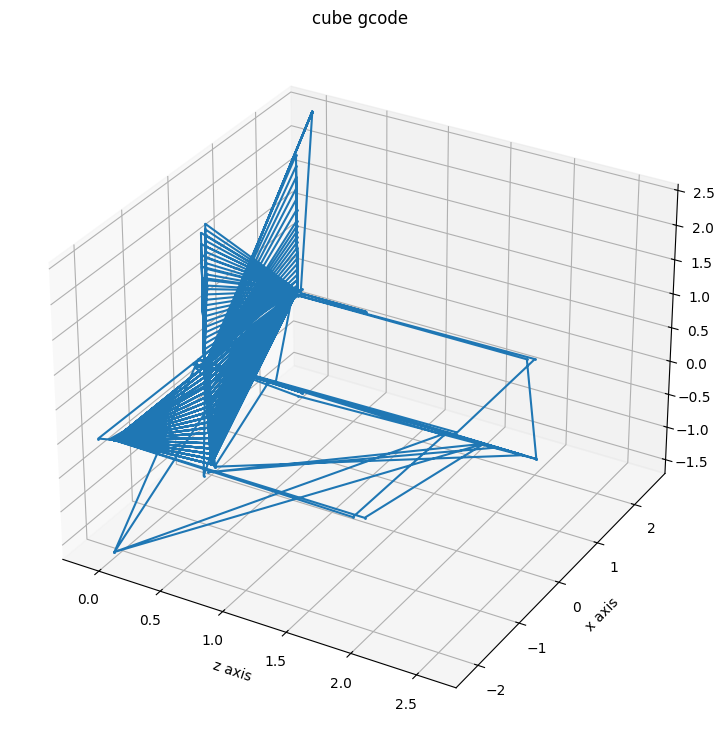

In [46]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# fig.canvas.draw()
# fig.set_layout_engine("none")
ax.set_position([-0.75, 0.025, 2.5, 1])
# fig = plt.figure()
# ax = Axes3D(fig)
plt.plot(cube_gcode_values['z'], cube_gcode_values['x'], cube_gcode_values['y'], marker='.', markersize=2)
plt.title('cube gcode')
plt.xlabel('z axis')
plt.ylabel('x axis')
plt.show()

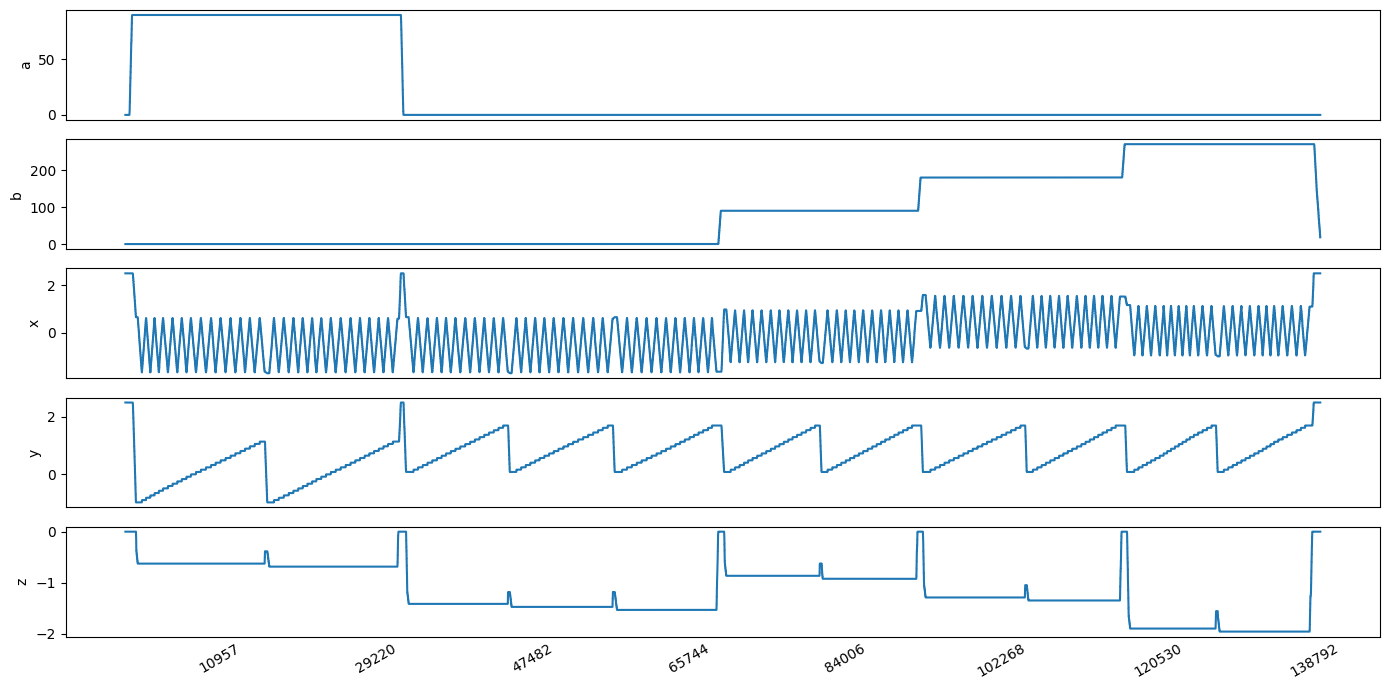

In [47]:
import matplotlib.dates as mdates

df = cube_movement
def data_plot(df):
    # Plot line charts
    df_plot = df.copy()

    ncols = 1
    nrows = int(round(df_plot.shape[1] / ncols, 0))

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
    for i, ax in enumerate(fig.axes):
        sns.lineplot(data=df_plot.iloc[:, i], ax=ax)
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    fig.tight_layout()
    plt.show()

# Plot the data
data_plot(df)
# df

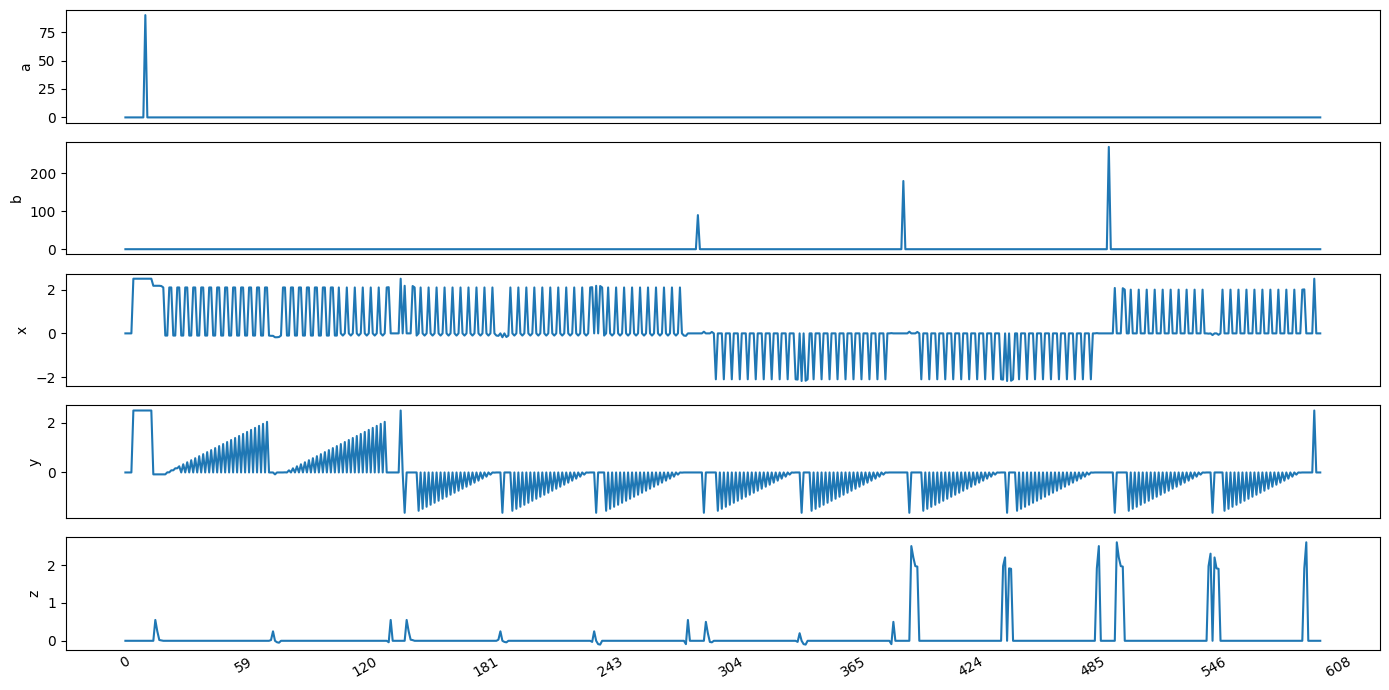

<Axes: >

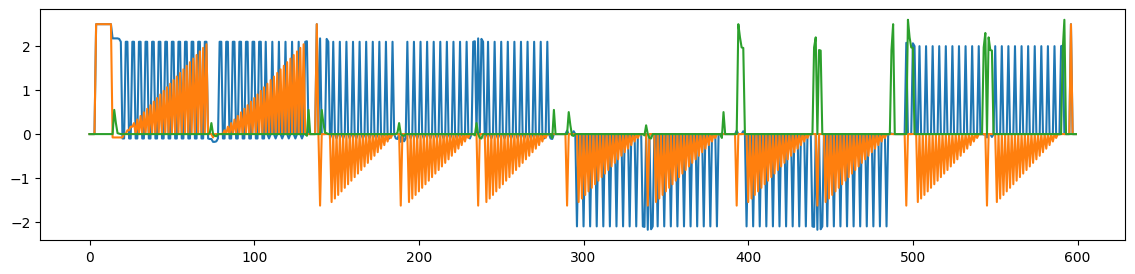

In [48]:
import matplotlib.dates as mdates

df = cube_gcode_values
def data_plot(df):
    # Plot line charts
    df_plot = df.copy()

    ncols = 1
    nrows = int(round(df_plot.shape[1] / ncols, 0))

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
    for i, ax in enumerate(fig.axes):
        sns.lineplot(data=df_plot.iloc[:, i], ax=ax)
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    fig.tight_layout()
    plt.show()

# Plot the data
data_plot(df)
cube_gcode_values['x'].plot(figsize=(14, 3))
cube_gcode_values['y'].plot(figsize=(14, 3))
cube_gcode_values['z'].plot(figsize=(14, 3))

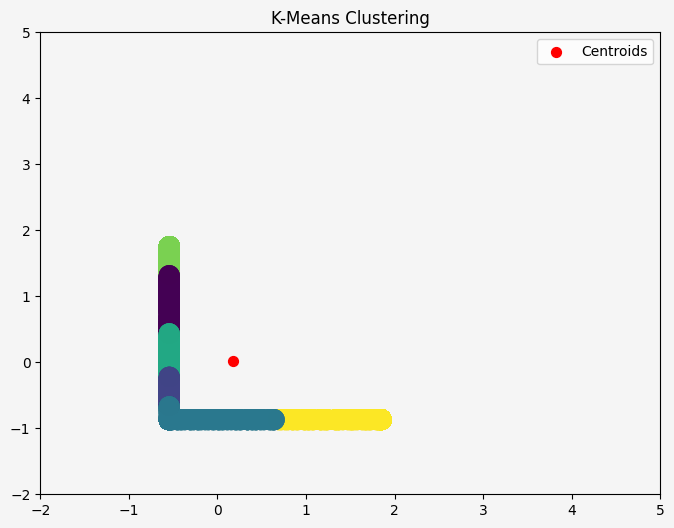

In [49]:
#forces_spiral_df = spiral_log.interpolate()
#forces_spiral_df = spiral_log_X.fillna(0)
kmean_spiral = cube_movement
kmean_spiral = cube_movement

# Scale the features using StandardScaler
scaler = StandardScaler()
kmean_spiral_scaled = pd.DataFrame(scaler.fit_transform(kmean_spiral))

kmeans_sp = KMeans(init='random', n_clusters=6, random_state=0, n_init=100).fit(kmean_spiral_scaled)

#Cluster centers and labels
#print("Cluster Centers:\n", kmeans.cluster_centers_)
#print("Labels:", kmeans.labels_)
centroids = kmeans_sp.cluster_centers_
labels = kmeans_sp.fit_predict(kmean_spiral)
unique_labels = np.unique(labels)
centroid_labels = [centroids[i] for i in labels]

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(kmean_spiral_scaled.iloc[:, 0], kmean_spiral_scaled.iloc[:, 1], s=200, c=kmeans_sp.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_sp.cluster_centers_[:, 0], kmeans_sp.cluster_centers_[:, 1], 
            s=200, c='red', marker='.', label='Centroids')

# for i in unique_labels:
#     plt.scatter(centroids[:, 0], centroids[:, 1], 
#                 marker='.', s=200, linewidths=3, color='r',
#                 label=unique_labels[i])
    
#plt.xlim(-3, 15)
plt.title("K-Means Clustering")
plt.gca().set_facecolor('whitesmoke')
plt.gcf().set_facecolor('whitesmoke')
plt.xlim(-2, 5)
plt.ylim(-2, 5)
plt.legend()
plt.show()
#print(centroid_labels)


In [50]:
cube_gcode_values

,a,b,x,y,z
0,0,0,0.0,0.0,0.0
1,0,0,0.0,0.0,0.0
2,0,0,0.0,0.0,0.0
3,0,0,0.0,0.0,0.0
4,0,0,2.5,2.5,0.0
...,...,...,...,...,...
595,0,0,0.0,0.0,0.0
596,0,0,2.5,2.5,0.0
597,0,0,0.0,0.0,0.0
598,0,0,0.0,0.0,0.0


In [51]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error, r2_score
from collections import defaultdict

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

Colour_Palette = ['#01BEFE', '#FF7D00', '#FFDD00', '#FF006D', '#ADFF02', '#8F00FF']
sns.set_palette(sns.color_palette(Colour_Palette))

tqdm.pandas()

In [52]:
# import yfinance as yf
# from datetime import date

# end_date = 1168.30011 # date.today().strftime("%Y-%m-%d")
# start_date = '0.0'

# df = cube_movement # yf.download('AAPL', start=start_date, end=end_date)

# base_time = datetime(2025, 7, 1)  # Epoch time as a reference
# datetime_series = [base_time + timedelta(seconds=seconds) for seconds in df['timestamp']] 
# df['timestamp'] = datetime_series
# # df = df.set_index(df['timestamp'])
# df.set_index('timestamp', inplace=True)
# # Print the results
# for dt in datetime_series:
#     print(dt)

# # Inspect the data
# print(df.head())
# print(df.info())

In [53]:
import math
from sklearn.preprocessing import MinMaxScaler

# Train test split
training_data_len = math.ceil(len(df) * .8)
print(training_data_len)

# Splitting the dataset
train_data = df[:training_data_len].iloc[:, :1]
test_data = df[training_data_len:].iloc[:, :1]
print(train_data.shape, test_data.shape)

# Selecting Open Price values
dataset_train = train_data.values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1, 1))
print(dataset_train.shape)

# Selecting Open Price values
dataset_test = test_data.values # was Open.values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1, 1))
print(dataset_test.shape)

scaler = MinMaxScaler(feature_range=(0, 1))
# Scaling dataset
scaled_train = scaler.fit_transform(dataset_train)
print(scaled_train[:5])

# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(scaled_test[:5])

480
(480, 1) (120, 1)
(480, 1)
(120, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [54]:
# Create sequences and labels for training data
sequence_length = 50  # Number of time steps to look back
X_train, y_train = [], []
for i in range(len(scaled_train) - sequence_length):
    X_train.append(scaled_train[i:i + sequence_length])
    y_train.append(scaled_train[i + sequence_length])  # Predicting the value right after the sequence
X_train, y_train = np.array(X_train), np.array(y_train)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
print(X_train.shape, y_train.shape)

# Create sequences and labels for testing data
sequence_length = 30  # Number of time steps to look back
X_test, y_test = [], []
for i in range(len(scaled_test) - sequence_length):
    X_test.append(scaled_test[i:i + sequence_length])
    y_test.append(scaled_test[i + sequence_length])  # Predicting the value right after the sequence
X_test, y_test = np.array(X_test), np.array(y_test)

# Convert data to PyTorch tensors
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
print(X_test.shape, y_test.shape)

torch.Size([430, 50, 1]) torch.Size([430, 1])
torch.Size([90, 30, 1]) torch.Size([90, 1])


In [55]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout=0.2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.linear = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.linear(out[:, -1, :])
        return out

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

input_size = 1
num_layers = 3  # Increased number of layers
hidden_size = 128  # Increased number of hidden units
output_size = 1
dropout = 0.2  # Added dropout for regularization

model = LSTMModel(input_size, hidden_size, num_layers, dropout).to(device)
loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.Adam(model.parameters(), lr=1e-3)  # Learning rate

batch_size = 32  # Adjusted batch size
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

num_epochs = 2  # Increased number of epochs
train_hist = []
test_hist = []

for epoch in range(num_epochs):
    total_loss = 0.0
    model.train()
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        predictions = model(batch_X)
        loss = loss_fn(predictions, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    train_hist.append(average_loss)

    model.eval()
    with torch.no_grad():
        total_test_loss = 0.0

        for batch_X_test, batch_y_test in test_loader:
            batch_X_test, batch_y_test = batch_X_test.to(device), batch_y_test.to(device)
            predictions_test = model(batch_X_test)
            test_loss = loss_fn(predictions_test, batch_y_test)

            total_test_loss += test_loss.item()

        average_test_loss = total_test_loss / len(test_loader)
        test_hist.append(average_test_loss)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}')

cpu


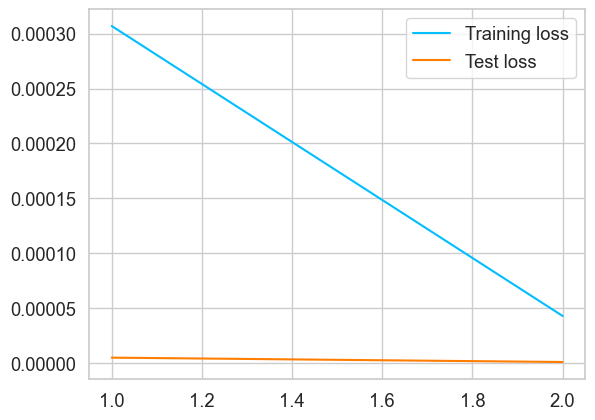

In [56]:
x = np.linspace(1,num_epochs,num_epochs)
plt.plot(x,train_hist,scalex=True, label="Training loss")
plt.plot(x, test_hist, label="Test loss")
plt.legend()
plt.show()

In [57]:
# num_forecast_steps = 1
# sequence_to_plot = X_test.squeeze().cpu().numpy()
# historical_data = sequence_to_plot[-1]

# forecasted_values = []
# with torch.no_grad():
#     for _ in range(num_forecast_steps):
#         historical_data_tensor = torch.as_tensor(historical_data).view(1, -1, 1).float().to(device)
#         predicted_value = model(historical_data_tensor).cpu().numpy()[0, 0]
#         forecasted_values.append(predicted_value)
#         historical_data = np.roll(historical_data, shift=-1)
#         historical_data[-1] = predicted_value

# last_date = test_data.index[-1]
# future_dates = pd.date_range(start=last_date + pd.Timedelta(5, unit='seconds'), periods=1)

# plt.rcParams['figure.figsize'] = [14, 4]
# plt.plot(test_data.index[-100:], test_data[-100:], label="test_data", color="b")
# plt.plot(test_data.index[-30:], test_data[-30:], label='actual values', color='green')
# plt.plot(test_data.index[-1:].append(future_dates), np.concatenate([test_data.aposm[-1:], scaler.inverse_transform(np.array(forecasted_values).reshape(-1, 1)).flatten()]), label='forecasted values', color='red')
# # plt.plot(test_data.index[-1:].append(future_dates), np.concatenate([test_data.Open[-1:], scaler.inverse_transform(np.array(forecasted_values).reshape(-1, 1)).flatten()]), label='forecasted values', color='red')

# plt.xlabel('Time Step')
# plt.ylabel('Value')
# #lt.xlim(100, 1000)
# plt.legend()
# plt.title('Time Series Forecasting')
# plt.grid(True)
# plt.show()

# # Evaluate the model and calculate RMSE and R² score
# model.eval()
# with torch.no_grad():
#     test_predictions = []
#     for batch_X_test in X_test:
#         batch_X_test = batch_X_test.to(device).unsqueeze(0)  # Add batch dimension
#         test_predictions.append(model(batch_X_test).cpu().numpy().flatten()[0])

# test_predictions = np.array(test_predictions)

# # Calculate RMSE and R² score
# mse = mean_squared_error(y_test.cpu().numpy(), test_predictions)
# rmse = np.sqrt(mean_squared_error(y_test.cpu().numpy(), test_predictions))
# r2 = r2_score(y_test.cpu().numpy(), test_predictions)

# print(f'MSE: , {mse:.5f}')
# print(f'RMSE: {rmse:.4f}')
# print(f'R² Score: {r2:.4f}')

In [58]:
cube_gcode_bad_y = cube_gcode_values.copy()
cube_gcode_bad_x = cube_gcode_values.copy()
cube_gcode_good = cube_gcode_values.copy()

In [437]:
cube_move_good = cube_movement.copy()
cube_move_good2 = cube_movement.copy()
cube_move_bad = cube_movement.copy()
cube_move_bad2 = cube_movement.copy()

In [438]:
cube_move_good2

,a,b,x,y,z
0,0.0,0.0000,2.5,2.5,0.0
1,0.0,0.0000,2.5,2.5,0.0
2,0.0,0.0000,2.5,2.5,0.0
3,0.0,0.0000,2.5,2.5,0.0
4,0.0,0.0000,2.5,2.5,0.0
...,...,...,...,...,...
139453,0.0,20.1381,2.5,2.5,0.0
139454,0.0,20.1381,2.5,2.5,0.0
139455,0.0,18.3001,2.5,2.5,0.0
139456,0.0,18.3001,2.5,2.5,0.0


In [439]:
# cube_gcode_bad_y['y'].iloc[:300] = cube_gcode_bad_y['y'].iloc[:300] + 0.15

In [440]:
cube_gcode_bad_x.loc[cube_gcode_bad_x['x'] != 0, 'x'] = cube_gcode_bad_x.loc[cube_gcode_bad_x['x'] != 0, 'x'] + 0.07 # adds numner to rows in col with no zeros
cube_gcode_bad_x.loc[cube_gcode_bad_x['y'] != 0, 'y'] = cube_gcode_bad_x.loc[cube_gcode_bad_x['y'] != 0, 'y'] + 0.07
cube_gcode_bad_x.loc[cube_gcode_bad_x['z'] != 0, 'z'] = cube_gcode_bad_x.loc[cube_gcode_bad_x['z'] != 0, 'z'] + 0.07

cube_gcode_good.loc[cube_gcode_good['x'] != 0, 'x'] = cube_gcode_good.loc[cube_gcode_good['x'] != 0, 'x'] + 0.05
cube_gcode_good.loc[cube_gcode_good['y'] != 0, 'y'] = cube_gcode_good.loc[cube_gcode_good['y'] != 0, 'y'] + 0.05
cube_gcode_good.loc[cube_gcode_good['z'] != 0, 'z'] = cube_gcode_good.loc[cube_gcode_good['z'] != 0, 'z'] + 0.05


cube_gcode_bad_y.loc[cube_gcode_bad_y['x'] != 0, 'x'] = cube_gcode_bad_y.loc[cube_gcode_bad_y['x'] != 0, 'x'] + 0.1
cube_gcode_bad_y.loc[cube_gcode_bad_y['y'] != 0, 'y'] = cube_gcode_bad_y.loc[cube_gcode_bad_y['y'] != 0, 'y'] + 0.1
cube_gcode_bad_y.loc[cube_gcode_bad_y['z'] != 0, 'z'] = cube_gcode_bad_y.loc[cube_gcode_bad_y['z'] != 0, 'z'] + 0.1

testing on movement data

In [441]:
cube_move_good.loc[cube_move_good['x'] != 0, 'x'] = cube_move_good.loc[cube_move_good['x'] != 0, 'x'] + 0.02
cube_move_good.loc[cube_move_good['y'] != 0, 'y'] = cube_move_good.loc[cube_move_good['y'] != 0, 'y'] + 0.01
cube_move_good.loc[cube_move_good['z'] != 0, 'z'] = cube_move_good.loc[cube_move_good['z'] != 0, 'z'] - 0.005


cube_move_good2.loc[cube_move_good2['x'] != 0, 'x'] = cube_move_good2.loc[cube_move_good2['x'] != 0, 'x'] - 0.02
cube_move_good2.loc[cube_move_good2['y'] != 0, 'y'] = cube_move_good2.loc[cube_move_good2['y'] != 0, 'y'] - 0.01
cube_move_good2.loc[cube_move_good2['z'] != 0, 'z'] = cube_move_good2.loc[cube_move_good2['z'] != 0, 'z'] + 0.005


# cube_move_good3.loc[cube_move_good3['x'] != 0, 'x'] = cube_move_good3.loc[cube_move_good3['x'] != 0, 'x'] - 0.05
# cube_move_good3.loc[cube_move_good3['y'] != 0, 'y'] = cube_move_good3.loc[cube_move_good3['y'] != 0, 'y'] - 0.05
# cube_move_good3.loc[cube_move_good3['z'] != 0, 'z'] = cube_move_good3.loc[cube_move_good3['z'] != 0, 'z'] - 0.05


cube_move_bad.loc[cube_move_bad['x'] != 0, 'x'] = cube_move_bad.loc[cube_move_bad['x'] != 0, 'x'] + 0.06
cube_move_bad.loc[cube_move_bad['y'] != 0, 'y'] = cube_move_bad.loc[cube_move_bad['y'] != 0, 'y'] - 0.07
cube_move_bad.loc[cube_move_bad['z'] != 0, 'z'] = cube_move_bad.loc[cube_move_bad['z'] != 0, 'z'] + 0.01


cube_move_bad2.loc[cube_move_bad2['x'] != 0, 'x'] = cube_move_bad2.loc[cube_move_bad2['x'] != 0, 'x'] - 0.06
cube_move_bad2.loc[cube_move_bad2['y'] != 0, 'y'] = cube_move_bad2.loc[cube_move_bad2['y'] != 0, 'y'] + 0.07
cube_move_bad2.loc[cube_move_bad2['z'] != 0, 'z'] = cube_move_bad2.loc[cube_move_bad2['z'] != 0, 'z'] - 0.01

In [442]:
# cube_gcode_bad_y['y'].iloc[:300] = cube_gcode_bad_y['y'].iloc[:300] + 0.15
# cube_gcode_bad_y['x'].iloc[:300] = cube_gcode_bad_y['x'].iloc[:300] + 0.25
# cube_gcode_bad_y['z'].iloc[:150] = cube_gcode_bad_y['z'].iloc[:150] + 0.25
# # cube_gcode_bad_y['y'] = cube_gcode_bad_y['y'].iloc[:120] + 0.75

In [443]:
cube_move_good2

,a,b,x,y,z
0,0.0,0.0000,2.48,2.49,0.0
1,0.0,0.0000,2.48,2.49,0.0
2,0.0,0.0000,2.48,2.49,0.0
3,0.0,0.0000,2.48,2.49,0.0
4,0.0,0.0000,2.48,2.49,0.0
...,...,...,...,...,...
139453,0.0,20.1381,2.48,2.49,0.0
139454,0.0,20.1381,2.48,2.49,0.0
139455,0.0,18.3001,2.48,2.49,0.0
139456,0.0,18.3001,2.48,2.49,0.0


In [444]:
cube_gcode_values['target'] = 1
cube_gcode_good['target'] = 1

cube_gcode_bad_y['target'] = 0
cube_gcode_bad_x['target'] = 0

In [445]:
cube_move_good['target'] = 1
cube_move_good2['target'] = 1

cube_move_bad['target'] = 0
cube_move_bad2['target'] = 0

In [446]:
cube_gcode_concat_df = pd.concat([cube_gcode_values, cube_gcode_bad_y, cube_gcode_bad_x, cube_gcode_good], axis=0)

In [447]:
cube_move_concat_df = pd.concat([cube_move_good, cube_move_good2, cube_move_bad, cube_move_bad2], axis=0)

cube_move_x_df = pd.concat([cube_move_good['x'], cube_move_good2['x'], cube_move_bad['x'], cube_move_bad2['x']], axis=0)
cube_move_y_df = pd.concat([cube_move_good['y'], cube_move_good2['y'], cube_move_bad['y'], cube_move_bad2['y']], axis=0)
cube_move_z_df = pd.concat([cube_move_good['z'], cube_move_good2['z'], cube_move_bad['z'], cube_move_bad2['z']], axis=0)

cube_move_x_df = pd.concat([cube_move_x_df, cube_move_concat_df['target']], axis=1)
cube_move_y_df = pd.concat([cube_move_y_df, cube_move_concat_df['target']], axis=1)
cube_move_z_df = pd.concat([cube_move_z_df, cube_move_concat_df['target']], axis=1)

In [448]:
cube_move_x_df

,x,target
0,2.52,1
1,2.52,1
2,2.52,1
3,2.52,1
4,2.52,1
...,...,...
139453,2.44,0
139454,2.44,0
139455,2.44,0
139456,2.44,0


In [449]:
cube_move_concat_df

,a,b,x,y,z,target
0,0.0,0.0000,2.52,2.51,0.0,1
1,0.0,0.0000,2.52,2.51,0.0,1
2,0.0,0.0000,2.52,2.51,0.0,1
3,0.0,0.0000,2.52,2.51,0.0,1
4,0.0,0.0000,2.52,2.51,0.0,1
...,...,...,...,...,...,...
139453,0.0,20.1381,2.44,2.57,0.0,0
139454,0.0,20.1381,2.44,2.57,0.0,0
139455,0.0,18.3001,2.44,2.57,0.0,0
139456,0.0,18.3001,2.44,2.57,0.0,0


In [450]:
# cube_gcode_concat_df = cube_gcode_concat_df.fillna(0)
# cube_gcode_concat_df

In [451]:
Xx = cube_move_x_df.drop(columns=['target'])
yx = pd.DataFrame(cube_move_x_df['target'])

# pca = PCA(n_components = 2)
# fps_X = pca.fit_transform(X)

X_trainx, X_testx, y_trainx, y_testx = train_test_split(Xx, yx, test_size=0.3, random_state=42, shuffle=True)


# scaler = RobustScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# y_train

knnx = KNeighborsClassifier(n_neighbors=5)
knnx.fit(X_trainx, y_trainx)

y_predx = knnx.predict(X_testx)

accuracyx = accuracy_score(y_testx, y_predx)
print("Length: ", len(X_testx))
print("Accuracy:", accuracyx)
class_reportx = classification_report(y_testx, y_predx)
print("Classification Report:\n", class_reportx)

# print("Percent 0 predicted: ", (((y_predx == 0).sum()/len(X_testx * 100))))

c:\Users\jas45\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Length:  167350
Accuracy: 0.8156139826710487
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82     83667
           1       0.82      0.81      0.82     83683

    accuracy                           0.82    167350
   macro avg       0.82      0.82      0.82    167350
weighted avg       0.82      0.82      0.82    167350



In [452]:
Xy = cube_move_y_df.drop(columns=['target'])
yy = pd.DataFrame(cube_move_y_df['target'])

X_trainy, X_testy, y_trainy, y_testy = train_test_split(Xy, yy, test_size=0.3, random_state=42, shuffle=True)

knny = KNeighborsClassifier(n_neighbors=5)
knny.fit(X_trainy, y_trainy)

y_predy = knny.predict(X_testy)

accuracyy = accuracy_score(y_testy, y_predy)
print("Length: ", len(X_testy))
print("Accuracy:", accuracyy)
class_reporty = classification_report(y_testy, y_predy)
print("Classification Report:\n", class_reporty)

# print("Percent 0 predicted: ", (((y_predy == 0).sum()/len(X_testy * 100))))

c:\Users\jas45\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Length:  167350
Accuracy: 0.9960023902001792
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     83667
           1       1.00      1.00      1.00     83683

    accuracy                           1.00    167350
   macro avg       1.00      1.00      1.00    167350
weighted avg       1.00      1.00      1.00    167350



In [453]:
Xz = cube_move_z_df.drop(columns=['target'])
yz = pd.DataFrame(cube_move_z_df['target'])

X_trainz, X_testz, y_trainz, y_testz = train_test_split(Xz, yz, test_size=0.3, random_state=42, shuffle=True)

knnz = KNeighborsClassifier(n_neighbors=5)
knnz.fit(X_trainz, y_trainz)

y_predz = knnz.predict(X_testz)

accuracyz = accuracy_score(y_testz, y_predz)
print("Length: ", len(X_testz))
print("Accuracy:", accuracyz)
class_reportz = classification_report(y_testz, y_predz)
print("Classification Report:\n", class_reportz)

# print("Percent 0 predicted: ", (((y_predz == 0).sum()/len(X_testz * 100))))

c:\Users\jas45\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Length:  167350
Accuracy: 0.9807887660591574
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     83667
           1       0.96      1.00      0.98     83683

    accuracy                           0.98    167350
   macro avg       0.98      0.98      0.98    167350
weighted avg       0.98      0.98      0.98    167350



use neural network to make prediction from knn

In [402]:
# y_pred = knn.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("Length: ", len(X_test))
# print("Accuracy:", accuracy)
# class_report = classification_report(y_test, y_pred)
# print("Classification Report:\n", class_report)

# print("Prediction accuracy: ", (((y_pred == 0).sum()/len(X_test * 100))))

a test like this will eventually be passed to one model, not split up

In [461]:
cube_move_bad_test = cube_movement.copy()

cube_move_bad_test.loc[cube_move_bad_test['x'] != 0, 'x'] = cube_move_bad_test.loc[cube_move_bad_test['x'] != 0, 'x'] + 0.05 # predicts 85% the values from training
cube_move_bad_test.loc[cube_move_bad_test['y'] != 0, 'y'] = cube_move_bad_test.loc[cube_move_bad_test['y'] != 0, 'y'] + 0.06
cube_move_bad_test.loc[cube_move_bad_test['z'] != 0, 'z'] = cube_move_bad_test.loc[cube_move_bad_test['z'] != 0, 'z'] + 0.01

In [462]:
cube_move_bad_test['target'] = 0

In [463]:
cube_move_bad_test

,a,b,x,y,z,target
0,0.0,0.0000,2.55,2.56,0.0,0
1,0.0,0.0000,2.55,2.56,0.0,0
2,0.0,0.0000,2.55,2.56,0.0,0
3,0.0,0.0000,2.55,2.56,0.0,0
4,0.0,0.0000,2.55,2.56,0.0,0
...,...,...,...,...,...,...
139453,0.0,20.1381,2.55,2.56,0.0,0
139454,0.0,20.1381,2.55,2.56,0.0,0
139455,0.0,18.3001,2.55,2.56,0.0,0
139456,0.0,18.3001,2.55,2.56,0.0,0


In [464]:
X_newx = cube_move_bad_test.drop(columns=['target', 'a', 'b', 'y', 'z'])
y_newx = pd.DataFrame(cube_move_bad_test['target'])

X_newy = cube_move_bad_test.drop(columns=['target', 'a', 'b', 'x', 'z'])
y_newy = pd.DataFrame(cube_move_bad_test['target'])

X_newz = cube_move_bad_test.drop(columns=['target', 'a', 'b', 'x', 'y'])
y_newz = pd.DataFrame(cube_move_bad_test['target'])

X_trainnewx, X_testnewx, y_trainnewx, y_testnewx = train_test_split(X_newx, y_newx, test_size=0.99, random_state=42, shuffle=True)
X_trainnewy, X_testnewy, y_trainnewy, y_testnewy = train_test_split(X_newy, y_newy, test_size=0.99, random_state=42, shuffle=True)
X_trainnewz, X_testnewz, y_trainnewz, y_testnewz = train_test_split(X_newz, y_newz, test_size=0.99, random_state=42, shuffle=True)

# scaler = RobustScaler()
# X_train = scaler.fit_transform(X_trainx)
# X_testnew = scaler.transform(X_test)
# y_train

y_prednewx = knnx.predict(X_testnewx)
y_prednewy = knny.predict(X_testnewy)
y_prednewz = knnz.predict(X_testnewz)

# accuracy = accuracy_score(y_test, y_prednew)
# print("Length: ", len(X_testnew))
# print("Accuracy:", accuracy)
# class_report = classification_report(y_test, y_prednew)
# print("Classification Report:\n", class_report)

print("Percent predicted: ", (((y_prednewx == 0).sum()/len(X_testnewx) * 100)))
print("Percent predicted: ", (((y_prednewy == 0).sum()/len(X_testnewy) * 100)))
print("Percent predicted: ", (((y_prednewz == 0).sum()/len(X_testnewz) * 100)))

Percent predicted:  51.39355661142658
Percent predicted:  46.23000927106269
Percent predicted:  96.33213582106849


In [465]:
accuracynewx = accuracy_score(y_testnewx, y_prednewx)
print("Length: ", len(X_testnewx))
print("Accuracy:", accuracynewx)
class_reportnewx = classification_report(y_testnewx, y_prednewx)
print("Classification Report:\n", class_reportnewx)

Length:  138064
Accuracy: 0.5139355661142658
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.51      0.68    138064
           1       0.00      0.00      0.00         0

    accuracy                           0.51    138064
   macro avg       0.50      0.26      0.34    138064
weighted avg       1.00      0.51      0.68    138064



c:\Users\jas45\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jas45\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jas45\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [466]:
accuracynewy = accuracy_score(y_testnewy, y_prednewy)
print("Length: ", len(X_testnewy))
print("Accuracy:", accuracynewx)
class_reportnewy = classification_report(y_testnewy, y_prednewy)
print("Classification Report:\n", class_reportnewy)

Length:  138064
Accuracy: 0.5139355661142658


c:\Users\jas45\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.46      0.63    138064
           1       0.00      0.00      0.00         0

    accuracy                           0.46    138064
   macro avg       0.50      0.23      0.32    138064
weighted avg       1.00      0.46      0.63    138064



c:\Users\jas45\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jas45\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [467]:
accuracynewz = accuracy_score(y_testnewz, y_prednewz)
print("Length: ", len(X_testnewz))
print("Accuracy:", accuracynewz)
class_reportnewz = classification_report(y_testnewz, y_prednewz)
print("Classification Report:\n", class_reportnewz)

Length:  138064
Accuracy: 0.9633213582106849


c:\Users\jas45\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jas45\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    138064
           1       0.00      0.00      0.00         0

    accuracy                           0.96    138064
   macro avg       0.50      0.48      0.49    138064
weighted avg       1.00      0.96      0.98    138064



c:\Users\jas45\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [242]:
X_train

,x,y
58494,0.5023,0.2277
51841,-0.9143,1.1189
111935,1.0922,1.1189
60050,-0.7783,0.4707
121820,0.1870,0.8758
...,...,...
110268,0.4672,0.8758
119879,-0.1366,0.5518
103694,0.3166,1.6049
131932,-0.1942,0.7948


In [243]:
X_test

,x,y
37762,-0.7450,0.7948
103549,0.8832,1.6049
127273,-0.8596,1.7670
36107,-0.3435,0.5518
16008,-0.6154,1.2053
...,...,...
82779,-0.0610,0.3087
81952,1.0083,0.1873
80430,0.8268,1.6860
64241,0.5134,1.1189


from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

clf = SVC(C=100,gamma=0.0001)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)

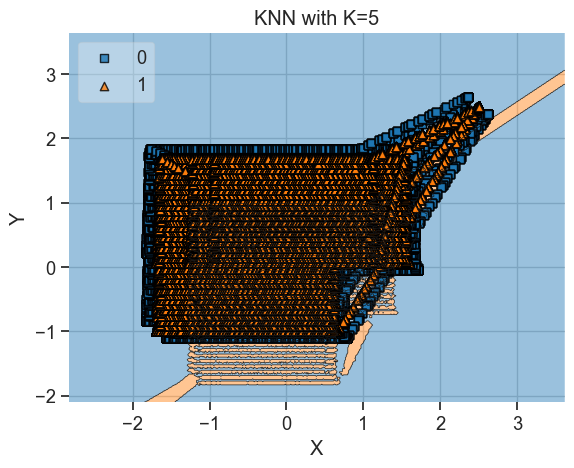

In [199]:
X_arr = np.array(X)
y_arr = np.array(y['target'])

from mlxtend.plotting import plot_decision_regions 
plot_decision_regions(X_arr, y_arr, clf=knn, legend=2)  


plt.xlabel('X')  
plt.ylabel('Y')
# plt.xlim(-5, 5)
# plt.ylim(-25, -18)
plt.title('KNN with K=5')

# Save the plot as an image file with tight bounding box and high resolution (150 dpi)
# plt.savefig('KNN with K=5.jpeg', bbox_inches="tight", dpi=150)

plt.show()

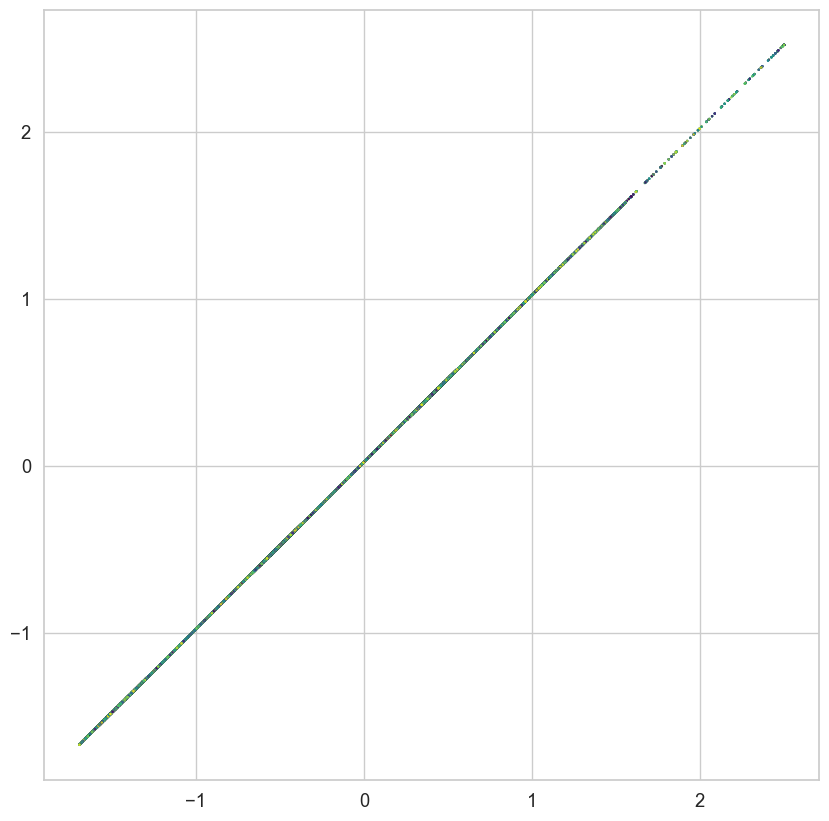

In [119]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = cube_move_good['x']
y = cube_move_good2['x']
# z = cube_move_concat_df['z']


colors = np.random.rand(len(cube_move_good))  # Colors for each point

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(x, y, c=colors, s=0.5, cmap='viridis', alpha=0.8)
plt.scatter(x, y, c=colors, s=0.5, cmap='viridis', alpha=0.8)
# Add labels
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# Add a color bar
# cbar = plt.colorbar(scatter)
# cbar.set_label('Color Intensity')

# Show the plot
plt.show()


In [70]:
X_train, X_test, y_train, y_test = pd.DataFrame(X_train),  pd.DataFrame(X_test),  pd.DataFrame(y_train),  pd.DataFrame(y_test)

Model:  SimpleModel(
  (fc1): Linear(in_features=5, out_features=50, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=50, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=1, bias=True)
)
Epoch [10/800], Loss: 0.6915
Epoch [20/800], Loss: 0.6910
Epoch [30/800], Loss: 0.6906
Epoch [40/800], Loss: 0.6903
Epoch [50/800], Loss: 0.6899
Epoch [60/800], Loss: 0.6894
Epoch [70/800], Loss: 0.6887
Epoch [80/800], Loss: 0.6878
Epoch [90/800], Loss: 0.6867
Epoch [100/800], Loss: 0.6852
Epoch [110/800], Loss: 0.6832
Epoch [120/800], Loss: 0.6808
Epoch [130/800], Loss: 0.6779
Epoch [140/800], Loss: 0.6747
Epoch [150/800], Loss: 0.6710
Epoch [160/800], Loss: 0.6684
Epoch [170/800], Loss: 0.6634
Epoch [180/800], Loss: 0.6595
Epoch [190/800], Loss: 0.6555
Epoch [200/800], Loss: 0.6521
Epoch [210/800], Loss: 0.6478
Epoch [220/800], Loss: 0.6438
Epoch [230/800], Loss: 0.6404
Epoch [240/800], Loss: 0.6365
Epoch [25

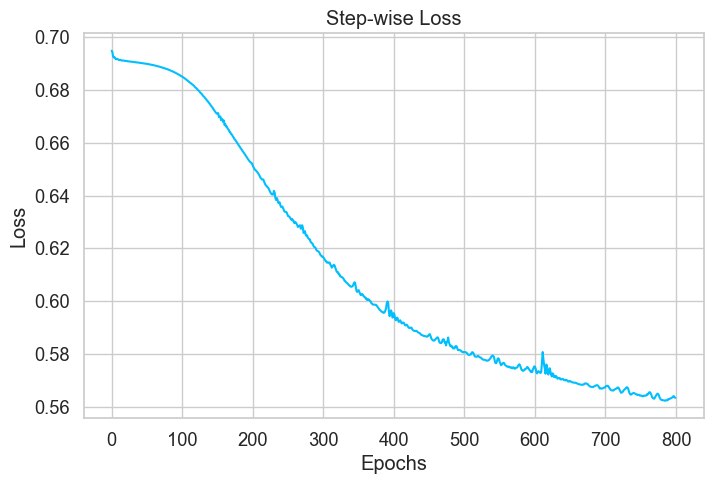

Test Accuracy: 61.94%
              precision    recall  f1-score   support

         0.0       0.59      0.68      0.63       349
         1.0       0.65      0.56      0.60       371

    accuracy                           0.62       720
   macro avg       0.62      0.62      0.62       720
weighted avg       0.62      0.62      0.62       720



array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
    

In [71]:
# Define the model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(5, 50)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(50, 100)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(100, 50)
        self.relu = nn.ReLU()
        self.fc4 = nn.Linear(50, 1)
 
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.relu(x)
        x = F.relu(self.fc2(x))
        x = self.relu(x)
        x = F.relu(self.fc3(x))
        x = self.relu(x)
        x = F.sigmoid(self.fc4(x))
        return x

# Instantiate the model, loss function, and optimizer
model = SimpleModel()
print("Model: ", model)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

X_train_tensor = torch.tensor(X_train.values)
X_train_tensor = X_train_tensor.float()

y_train_tensor = torch.tensor(y_train.values)
y_train_tensor = y_train_tensor.float()

X_test_tensor = torch.tensor(X_test.values)
X_test_tensor = X_test_tensor.float()

y_test_tensor = torch.tensor(y_test.values)
y_test_tensor = y_test_tensor.float()

# Training loop
epochs = 800
loss_values = []

for epoch in range(epochs):
    # Forward pass
    output_pred = model(X_train_tensor)
    loss = criterion(output_pred, y_train_tensor)
    loss_values.append(loss.item())

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
 
    # Print the loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
    
step = range(len(loss_values))

fig, ax = plt.subplots(figsize=(8,5))
plt.plot(step, np.array(loss_values))
plt.title("Step-wise Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Test the trained model
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    #predicted_classes = torch.argmax(test_outputs, dim=1)
    predicted = np.where(test_outputs.numpy() < 0.5, 0, 1)  # Convert to NumPy and apply threshold
    #predicted = list(itertools.chain(*predicted))  # Flatten predictions
 
    accuracy = torch.sum(predicted == y_test_tensor).item() / len(y_test_tensor)
    print(f'Test Accuracy: {accuracy * 100:.2f}%')
 
print(classification_report(y_test_tensor, predicted))

predicted

Orthogonal slope: -0.9464809577195284, Connecting line slope: -0.2431261795718859


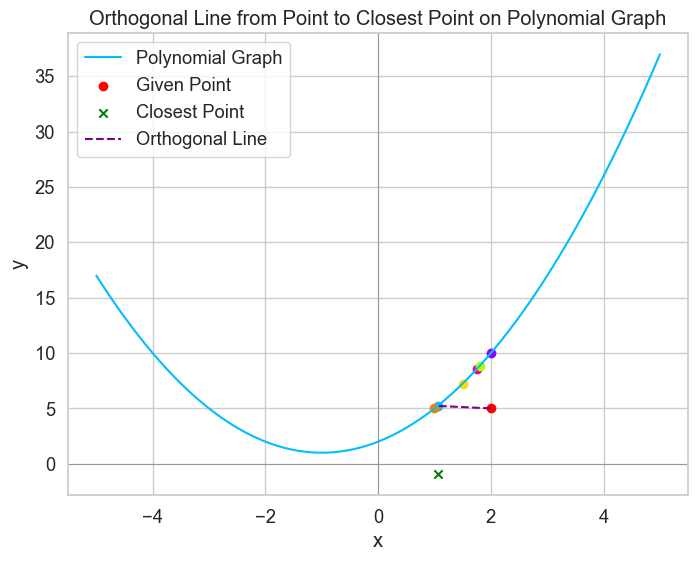

In [72]:
import numpy as np
import matplotlib.pyplot as plt

def polynomial(x):
    return x**2 + 2*x + 2  # Example polynomial: y = x^2 + 2x + 1

def distance_squared(x, x0, y0, poly_func):
    """Calculates the squared distance between (x0, y0) and (x, poly_func(x))."""
    return (x - x0)**2 + (poly_func(x) - y0)**2

def derivative_distance_squared(x, x0, y0, poly_func, poly_deriv_func):
    """Calculates the derivative of the squared distance function."""
    return 2 * (x - x0) + 2 * (poly_func(x) - y0) * poly_deriv_func(x)

# Given point
target_point = (2, 5)

# Calculate the derivative of the polynomial
# For x^2 + 2x + 1, the derivative is 2x + 2
poly_derivative = np.polyder(np.array([1, 2, 1])) 

def poly_deriv_func(x):
    return np.polyval(poly_derivative, x)

# Find the closest point using numerical root finding (e.g., fsolve)
# The `fsolve` function is part of the `scipy.optimize` module
from scipy.optimize import fsolve

# Initial guess for the root of the derivative of the squared distance
initial_guess = 1.8

# Find the x-coordinate of the closest point
closest_x = fsolve(derivative_distance_squared, initial_guess, 
                   args=(target_point[0], target_point[1], 
                         polynomial, poly_deriv_func))[0]

closest_y = polynomial(closest_x)
closest_point = (closest_x, closest_y)

orthogonal_slope = -1/closest_x


def ploy_deriv(x):
    return 2*x + 2



slope_connecting_line = (target_point[1] - closest_y) / (target_point[0] - closest_x)
print(f"Orthogonal slope: {orthogonal_slope}, Connecting line slope: {slope_connecting_line}")

# Plotting
x_values = np.linspace(-5, 5, 400)
y_values = polynomial(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Polynomial Graph')
plt.scatter(target_point[0], target_point[1], color='red', marker='o', label='Given Point')
plt.scatter(closest_point[0], orthogonal_slope, color='green', marker='x', label='Closest Point')
plt.plot([target_point[0], closest_point[0]], 
         [target_point[1], closest_point[1]], 
         color='purple', linestyle='--', label='Orthogonal Line')

plt.scatter(closest_x, closest_y)
ycoord = polynomial(1.8)
ycoord2 = polynomial(1.5)
ycoord3 = polynomial(2)
ycoord4 = polynomial(1)
ycoord5 = polynomial(1.75)

plt.scatter(1, ycoord4)
plt.scatter(1.5, ycoord2)
plt.scatter(1.75, ycoord5)
plt.scatter(1.8, ycoord)
plt.scatter(2, ycoord3)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Orthogonal Line from Point to Closest Point on Polynomial Graph')
plt.grid(True)
plt.legend()
plt.axvline(0, color='gray', linewidth=0.5)
plt.axhline(0, color='gray', linewidth=0.5)
plt.show()



In [73]:
def poly_deriv(x):
    return 2*x + 2




xcoord = poly_deriv(2)
xcoord


6

In [74]:
poly_derivative

array([2, 2])

In [75]:
ycoord = polynomial(1.8)
ycoord

8.84

Distance between target and estimate:  7.0
Orthogonal slope: -1.1662518649806903, Connecting line slope: -0.26918658070978374
y of point:  12


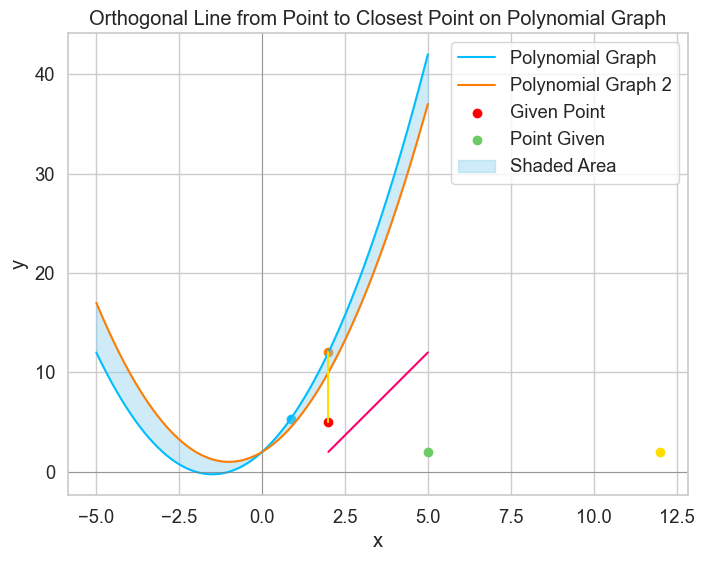

ycoord3 : 12


In [76]:
import numpy as np
import matplotlib.pyplot as plt

def polynomial(x):
    return x**2 + 3*x + 2  # Example polynomial: y = x^2 + 2x + 1

# Given point
target_point = (2, 5)

# Calculate the derivative of the polynomial
# For x^2 + 2x + 1, the derivative is 2x + 2
poly_derivative = np.polyder(np.array([1, 2, 1])) 

def poly_deriv_func(x):
    return np.polyval(poly_derivative, x)

# Find the closest point using numerical root finding (e.g., fsolve)
# The `fsolve` function is part of the `scipy.optimize` module
from scipy.optimize import fsolve

# Initial guess for the root of the derivative of the squared distance
initial_guess = 1.8

# Find the x-coordinate of the closest point
closest_x = fsolve(derivative_distance_squared, initial_guess, 
                   args=(target_point[0], target_point[1], 
                         polynomial, poly_deriv_func))[0]

closest_y = polynomial(closest_x)
closest_point = (closest_x, closest_y)

orthogonal_slope = -1/closest_x


def ploy_deriv(x):
    return 2*x + 3

ycoord = polynomial(1.8)
ycoord2 = polynomial(1.5)
ycoord3 = polynomial(2)
ycoord4 = polynomial(1)
ycoord5 = polynomial(1.75)

def dist(xc, yc, x, y):
    return np.sqrt((xc - x)**2 + (yc - y)**2)

print("Distance between target and estimate: ", dist(2, ycoord3, 2, 5))

slope_connecting_line = (target_point[1] - closest_y) / (target_point[0] - closest_x)
print(f"Orthogonal slope: {orthogonal_slope}, Connecting line slope: {slope_connecting_line}")

# Plotting
x_values = np.linspace(-5, 5, 400)
y_values = polynomial(x_values)


def polynomial2(x):
    return x**2 + 2*x + 2  # Example polynomial: y = x^2 + 2x + 1

# Plotting
x_values2 = np.linspace(-5, 5, 400)
y_values2 = polynomial2(x_values2)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Polynomial Graph')
plt.plot(x_values2, y_values2, label='Polynomial Graph 2')
plt.scatter(target_point[0], target_point[1], color='red', marker='o', label='Given Point')
# plt.scatter(closest_point[0], orthogonal_slope, color='green', marker='x', label='Closest Point')
# plt.plot([target_point[0], closest_point[0]], 
#          [target_point[1], closest_point[1]], 
#          color='purple', linestyle='--', label='Orthogonal Line')

plt.scatter(closest_x, closest_y)

# plt.scatter(1, ycoord4)
# plt.scatter(1.5, ycoord2)
# plt.scatter(1.75, ycoord5)
# plt.scatter(1.8, ycoord)
plt.scatter(2, ycoord3)
plt.plot([2, 2], [5, ycoord3])
plt.plot([2, 5], [2, ycoord3])
plt.scatter(ycoord3, 2)
print("y of point: ", ycoord3)

plt.scatter(target_point[1], target_point[0], color='g', marker='o', label='Point Given')


plt.fill_between(x_values,  y_values, y_values2, color='skyblue', alpha=0.4, label='Shaded Area')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Orthogonal Line from Point to Closest Point on Polynomial Graph')
plt.grid(True)
plt.legend()
plt.axvline(0, color='gray', linewidth=0.5)
plt.axhline(0, color='gray', linewidth=0.5)
plt.show()

print("ycoord3 :", ycoord3)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def polynomial(x):
    return x**2 + 2*x + 2  # Example polynomial: y = x^2 + 2x + 1

def distance_squared(x, x0, y0, poly_func):
    """Calculates the squared distance between (x0, y0) and (x, poly_func(x))."""
    return (x - x0)**2 + (poly_func(x) - y0)**2

def derivative_distance_squared(x, x0, y0, poly_func, poly_deriv_func):
    """Calculates the derivative of the squared distance function."""
    return 2 * (x - x0) + 2 * (poly_func(x) - y0) * poly_deriv_func(x)

# Given point
target_point = (2, 5)

# Calculate the derivative of the polynomial
# For x^2 + 2x + 1, the derivative is 2x + 2
poly_derivative = np.polyder(np.array([1, 2, 1])) 

def poly_deriv_func(x):
    return np.polyval(poly_derivative, x)

# Find the closest point using numerical root finding (e.g., fsolve)
# The `fsolve` function is part of the `scipy.optimize` module
from scipy.optimize import fsolve

# Initial guess for the root of the derivative of the squared distance
initial_guess = 1.8

# Find the x-coordinate of the closest point
closest_x = fsolve(derivative_distance_squared, initial_guess, 
                   args=(target_point[0], target_point[1], 
                         polynomial, poly_deriv_func))[0]

closest_y = polynomial(closest_x)
closest_point = (closest_x, closest_y)

orthogonal_slope = -1/closest_x


def ploy_deriv(x):
    return 2*x + 2



slope_connecting_line = (target_point[1] - closest_y) / (target_point[0] - closest_x)
print(f"Orthogonal slope: {orthogonal_slope}, Connecting line slope: {slope_connecting_line}")

# Plotting
x_values = np.linspace(-5, 5, 400)
y_values = polynomial(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Polynomial Graph')

a = 
x = x_values
y = y_values
b = 

# fit a linear curve and estimate its y-values and their error.
# a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)


plt.xlabel('x')
plt.ylabel('y')
plt.title('Orthogonal Line from Point to Closest Point on Polynomial Graph')
plt.grid(True)
plt.legend()
plt.axvline(0, color='gray', linewidth=0.5)
plt.axhline(0, color='gray', linewidth=0.5)
plt.show()



SyntaxError: invalid syntax (981835387.py, line 58)

In [ ]:
# fit a linear curve and estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)